# **MÓDULO 14 - Exercício**
# Pré-processamento dos Dados - A primeira etapa Pré-modelagem

Para nossa atividade usaremos uma base de churn também, porém essa base não diz respeito a serviços bancários e sim a serviços de internet, telefone e TV - Telecomunicação.

Vamos realizar aqui as etapas de limpeza e tratamento de dados vistas durante a aula, porém aplicadas a essa nova base.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"  # Exibe todas as expressões da célula
import numpy as np

In [2]:
# Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
caminho = r'C:\Users\MIGUEL\OneDrive\Programação\EBAC\AtividadesEBAC\EBAC.DATA_SCIENCE\Atividade_Cap14\CHURN_TELECON_MOD08_TAREFA.csv'

if os.path.exists(caminho):
    print("O caminho foi encontrado!")
else:
    print("O caminho não foi encontrado.")

df = pd.read_csv(caminho)

df = pd.read_csv(caminho, delimiter=';')

df.head(10)

O caminho foi encontrado!


,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
5,9305-CDSKC,NaN,0,No,No,8,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,0,No,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,0,No,No,10,No,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,0,Yes,No,28,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,0,No,Yes,62,Yes,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,NaN


Legenda dos dados:

*   **CustomerID** : Esse é o ID único de cada cliente da nossa rede de produtos de telecomunicação.

*   **Genero** : O gênero dos nossos clientes.

*   **Idoso** : Se nosso cliente tem acima de 60 anos ou não. (Sim = 1 | Não = 0)

*   **Casado** : Se nosso cliente é casado ou não.

*   **Dependents** : Se o cliente tem dependentes.

*   **Tempo_como_Cliente** : Tempo em meses que nosso cliente está com a nossa empresa.

*   **PhoneService** : Se ele contratou serviço telefônico com a nossa empresa.

*   **Servico_Internet** : Qual o tipo de serviço de internet contratado.

*   **Servico_Seguranca** : Se ele contratou serviço de segurança com a nossa empresa.

*   **Suporte_Tecnico** : Se já acionou o suporte técnico.

*   **StreamingTV** : Se ele contratou serviço de streaming para TV.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **PaymentMethod** : Forma de pagamento.

*   **Pagamento_Mensal** : Quanto o cliente pagava mensalmente.

*   **Total_Pago** : Total já pago pelo cliente para nossa companhia.

*   **Churn** : Nossa coluna mais importante, se nosso cliente nos abandonou ou não.




# 1 - Carregue a base, verifique se os tipos de dados estão de acordo com cada coluna e caso não estejam realize a transformação dos tipos de dados.

In [3]:
df.info() # Verifiquei as informações.
df.duplicated().sum() # Verifiquei se havia duplicatas.
df['Idoso'] = df['Idoso'].astype('boolean') # Passei a coluna do idoso para bool, já que estava incorreto...
df['Pagamento_Mensal'] = df['Pagamento_Mensal'].astype('float')

# Resolvi transformar todas essas colunas com yes and no para bool visando deixar cada situação em seu respectivo tipo.
Boleana_mapa = {'Sim': True, 'Não': False, 'Nao': False, 'Yes': True, 'No': False}
possiveis_bools = [i for i in df.columns
                   if set(df[i].astype(str)).issubset({'Sim','Não','Nao','Yes','No'})]

for i in possiveis_bools:
    df[i] = df[i].map(Boleana_mapa).astype('boolean')


df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          2500 non-null   object 
 1   Genero              2488 non-null   object 
 2   Idoso               2500 non-null   int64  
 3   Casado              2500 non-null   object 
 4   Dependents          2500 non-null   object 
 5   Tempo_como_Cliente  2500 non-null   int64  
 6   PhoneService        1018 non-null   object 
 7   Servico_Internet    2500 non-null   object 
 8   Servico_Seguranca   2500 non-null   object 
 9   Suporte_Tecnico     2500 non-null   object 
 10  StreamingTV         2500 non-null   object 
 11  Tipo_Contrato       2500 non-null   object 
 12  PaymentMethod       2500 non-null   object 
 13  Pagamento_Mensal    2175 non-null   float64
 14  Total_Pago          2500 non-null   float64
 15  Churn               2495 non-null   object 
dtypes: flo

np.int64(0)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,False,True,False,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,False,False,False,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,False,False,False,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,False,False,False,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,False,False,False,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
5,9305-CDSKC,NaN,False,False,False,8,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,False,False,True,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,False,False,False,10,No,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,False,True,False,28,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,False,False,True,62,Yes,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,NaN


# 2 - Verifique se encontramos valores digitados incorretamente, ou com letras maiúsculas ou minúsculas, ou até mesmo mesmos valores porém escritos de forma diferente e corrija.
(Escolhi fazer a normalização antes de fazer a substituição de valores para facilitar a minha análise.)

In [4]:
# Comecei fazendo algumas verificações, só duas colunas tinham dados que precisavam ser normalizados, mas no final preferi deixar tudo maiúsculo.

df['Servico_Internet'] = df['Servico_Internet'].str.upper()
df['Servico_Internet'].unique() # Encontrei um erro nessa coluna.

df['Servico_Seguranca'] = df['Servico_Seguranca'].str.upper()
df['Servico_Seguranca'].unique()

df['Suporte_Tecnico'] = df['Suporte_Tecnico'].str.upper()
df['Suporte_Tecnico'].unique()

df['StreamingTV'] = df['StreamingTV'].str.upper()
df['StreamingTV'].unique()

df['Genero'] = df['Genero'].str.upper()
df['Genero'] = df['Genero'].replace('F', 'FEMALE')
df['Genero'] = df['Genero'].replace('M', 'MALE')
df['Genero'].unique() # Havia outro erro aqui, então fiz o replace.

df['Tipo_Contrato'] = df['Tipo_Contrato'].str.upper()
df['Tipo_Contrato'].unique()

df['PaymentMethod'] = df['PaymentMethod'].str.upper()
df['PaymentMethod'].unique()

array(['DSL', 'FIBER OPTIC', 'NO'], dtype=object)

array(['NO', 'YES', 'NO INTERNET SERVICE'], dtype=object)

array(['NO', 'YES', 'NO INTERNET SERVICE'], dtype=object)

array(['NO', 'YES', 'NO INTERNET SERVICE'], dtype=object)

array(['FEMALE', 'MALE', nan], dtype=object)

array(['MONTH-TO-MONTH', 'ONE YEAR', 'TWO YEAR'], dtype=object)

array(['ELECTRONIC CHECK', 'MAILED CHECK', 'BANK TRANSFER (AUTOMATIC)',
       'CREDIT CARD (AUTOMATIC)'], dtype=object)

# 3 - Esse exercício faremos por etapas:
A) Verifique se temos colunas com dados faltantes e traga a % dos dados faltantes por coluna.

In [5]:
df.isnull().sum()
(df.isnull().sum() / len(df)) * 100 # Verificando a porcentagem de valores nulos.

customerID               0
Genero                  12
Idoso                    0
Casado                   0
Dependents               0
Tempo_como_Cliente       0
PhoneService          1482
Servico_Internet         0
Servico_Seguranca        0
Suporte_Tecnico          0
StreamingTV              0
Tipo_Contrato            0
PaymentMethod            0
Pagamento_Mensal       325
Total_Pago               0
Churn                    5
dtype: int64

customerID             0.00
Genero                 0.48
Idoso                  0.00
Casado                 0.00
Dependents             0.00
Tempo_como_Cliente     0.00
PhoneService          59.28
Servico_Internet       0.00
Servico_Seguranca      0.00
Suporte_Tecnico        0.00
StreamingTV            0.00
Tipo_Contrato          0.00
PaymentMethod          0.00
Pagamento_Mensal      13.00
Total_Pago             0.00
Churn                  0.20
dtype: float64

B) Exclua nesta etapa as linhas das colunas com dados faltantes que você analisar que esse método é o ideal. Justifique o motivo de estar excluindo essas linhas.

Resposta: As linhas da coluna que achei prudente apagar foram da coluna Gênero, por haver uma quantidade pequena de valores nulos e representar uma porcentagem muito baixa em relação ao todo (representa menos de 0,5 por cento). Logo, sua remoção não causaria uma perda significativa de dados. 

In [6]:
df.dropna(subset='Genero', inplace=True) # Retirando os valores nulos dessa coluna. 

C) Nessa etapa substitua pela média, mediana ou moda as linhas das colunas com valores faltantes que você analisou e entendeu que esse era o melhor método. Não se esqueça de justificar sua escolha.

**Dica variáveis numéricas:** Não se esqueça de verificar a distribuição dos dados, média e mediana.

**Dica variáveis categóricas:** Caso precise substituir uma variável categórica utilize um gráfico de barras para verificar a que mais aparece e utilizar ela na substituição.
Ou você pode optar por excluir a coluna, mas justifique sua escolha.

Caso opte por substituir você pode utilizar a função fillna:
df['SUACOLUNA'].fillna("VALOR QUE SUBSTITUIRÁ O NULO", inplace=True)
Ela funcionará como o replace.

# Pagamento mensal

Resposta: Decidi fazer a substituição nesse caso, por haver uma grande quantidade de dados, dados estes que provavelmente têm impacto na taxa de churn. A substituição não poderia ser direta (pela média global), já que poderia causar um viés pela alta quantidade de valores nulos, então primeiro fiz a média me baseando em grupos específicos e depois disso, caso ainda restassem valores nulos, utilizei a média global. Verifiquei as médias das pessoas que, por exemplo, não tinham serviço de internet antes e depois do tratamento, o resultado foi muito bom, já que antes da substituição a média era 19 e após a substituição a média foi para 20 (OBS: a média global do pagamento mensal é 65), logo calcular a média por grupo foi eficaz para evitar viés.

np.float64(65.60756321839081)

71.45

PhoneService
No     39.150
NaN    73.650
Yes    74.425
Name: Pagamento_Mensal, dtype: float64

Servico_Internet
NO             20.125
DSL            58.675
FIBER OPTIC    91.050
Name: Pagamento_Mensal, dtype: float64

<Figure size 600x400 with 0 Axes>

<Axes: ylabel='Pagamento_Mensal'>

Text(0.5, 1.0, 'Boxplot da Coluna Pagamento_Mensal')

Text(0, 0.5, 'Pagamento_Mensal')

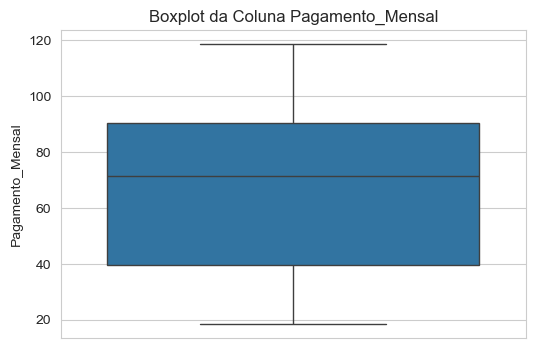

0


In [7]:
# Primeiro, vou fazer a substituição dos dados da coluna Pagamento_Mensal.

# Análise para decidir como prosseguir e como substituir.

df['Pagamento_Mensal'].mean()
df['Pagamento_Mensal'].median()

# Por precaução vou verificar a mediana e a média com base em grupos importantes/que interferem diretamente no pagamento mensal para garantir que não vou gerar problemas para um futuro modelo de machine learning, para evitar viés.
df.groupby('PhoneService', dropna=False)['Pagamento_Mensal'].median().sort_values()
df.groupby('Servico_Internet', dropna=False)['Pagamento_Mensal'].median().sort_values()

# Agora, como garantia, vou fazer um gráfico para verificar se há outliers.
sns.set_style('whitegrid')

plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='Pagamento_Mensal')
plt.title('Boxplot da Coluna Pagamento_Mensal')
plt.ylabel('Pagamento_Mensal')
plt.show() # O gráfico mostra que não preciso me preocupar muito com outliers nesse momento.
# Após uma verificação rápida, vejo que 2 grupos em específico precisam ter um tratamento especial ou podem gerar problemas no futuro.

# A resolução e substituição

# Calculei a média por grupo
media_por_grupo = df.groupby(['PhoneService', 'Servico_Internet'])['Pagamento_Mensal'].transform('mean')

# Preenchi os nulos com a média do grupo
df['Pagamento_Mensal'] = df['Pagamento_Mensal'].fillna(media_por_grupo)

# Se ainda restarem nulos, preenchi com a média geral.
df['Pagamento_Mensal'] = df['Pagamento_Mensal'].fillna(df['Pagamento_Mensal'].mean()) 

print(df['Pagamento_Mensal'].isnull().sum())

# Serviço de Telefone

Resposta: Eu decidi fazer a substituição por haver muitos dados nulos nessa coluna, apagar traria uma perda de dados grande demais. Novamente encontrei um problema de não poder substituir pelo que aparece mais, e após análises no dataframe descobri informações importantes que me ajudaram na substituição. Nesse exercício me concentrei ao máximo em fazer conexões com outros tipos de dados para evitar criar viés e fazer substituições lógicas.

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='PhoneService', ylabel='Count'>

PhoneService,No,Yes,NaN
Servico_Internet,,,
DSL,86,271,485
FIBER OPTIC,0,431,688
NO,0,218,309


<Figure size 600x400 with 0 Axes>

<Axes: xlabel='Servico_Internet', ylabel='count'>

Text(0.5, 1.0, 'Distribuição da Coluna "Servico_Internet" para PhoneService')

Text(0.5, 0, 'Servico_Internet')

Text(0, 0.5, 'Contagem')

([0, 1, 2], [Text(0, 0, 'DSL'), Text(1, 0, 'NO'), Text(2, 0, 'FIBER OPTIC')])

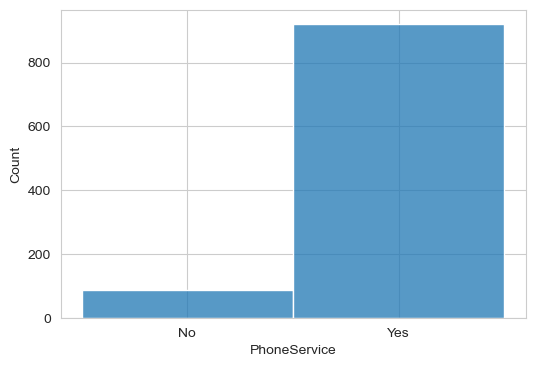

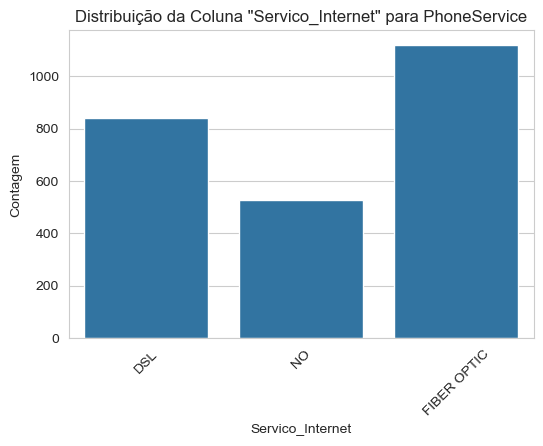

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='Servico_Internet', ylabel='count'>

Text(0.5, 1.0, 'Distribuição da Coluna "Servico_Internet" para PhoneService Nulo')

Text(0.5, 0, 'Servico_Internet')

Text(0, 0.5, 'Contagem')

([0, 1, 2], [Text(0, 0, 'FIBER OPTIC'), Text(1, 0, 'DSL'), Text(2, 0, 'NO')])

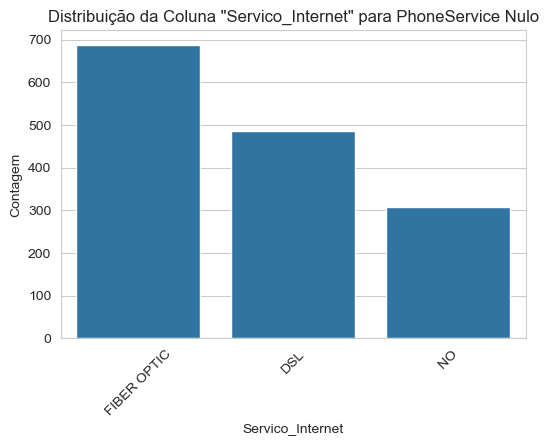

       Tem_DSL  Pagamento_Mensal
0          DSL             60.50
1  Não usa DSL             80.35


In [8]:
# Agora vou lidar com PhoneService

# Para fazer isso, primeiro coloquei um gráfico para ver a proporção de PhoneService
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='PhoneService') # Com o gráfico consegui ver que a disparidade de valores é grande, e pode ser perigoso alternar todos os valores por um valor específico.

# Vou ver a distribuição dos valores em relação ao Serviço de Internet, já que teoricamente para ser cliente, obrigatoriamente teria que ter um ou outro. (Percebi isso pois outros serviços da empresa, uma das opções era No Internet Service, logo para ter os outros serviços era necessário ter Servico_Internet e se a pessoa não o tem, obrigatoriamente teria que ter PhoneService, se não a pessoa não seria um cliente. Logo, minha hipótese é: se Servico_Internet == No, PhoneService == Yes.)

# Para ter certeza da minha hipótese vou utilizar o crosstab

pd.crosstab(
    df['Servico_Internet'],
    df['PhoneService'],
    dropna=False    
)

# Com isso não só consegui confirmar minha hipótese mas também vi que todos que usam fiber optic também usam PhoneService, logo vou seguir assim para não criar informações.

plt.figure(figsize=(6, 4)) 
sns.countplot(data=df, x='Servico_Internet')
plt.title('Distribuição da Coluna "Servico_Internet" para PhoneService')
plt.xlabel('Servico_Internet')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

# Agora quero ver a distribuição dos valores nulos. Primeiro selecionei as linhas onde os valores são nulos.
PhoneService_nulo = df[df['PhoneService'].isnull()]

# Fazendo o gráfico para ver a distribuição.
plt.figure(figsize=(6, 4))
sns.countplot(data=PhoneService_nulo, x='Servico_Internet')
plt.title('Distribuição da Coluna "Servico_Internet" para PhoneService Nulo')
plt.xlabel('Servico_Internet')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()


# Com base na análise consegui descobrir como substituir sem causar viés.

servico_I = df["Servico_Internet"].values # armazenei os valores que iria precisar...
phone_S = df["PhoneService"].values
pagamento_M = df['Pagamento_Mensal'].values

# Criei 2 laços de repetição simples que trocam o nulo caso as necessidades forem atendidas (necessidades estas que se baseiam na distribuição dos dados e na minha hipótese).

for i in range(len(df)):
    if pd.isna(phone_S[i]) and servico_I[i] == "NO":
        phone_S[i] = "Yes"

for i in range(len(df)):
    if pd.isna(phone_S[i]) and servico_I[i] == "FIBER OPTIC":
        phone_S[i] = "Yes"

df["PhoneService"] = phone_S

# Para decidir o que fazer com o restante dos dados precisei aprofundar a análise

df["Tem_DSL"] = np.where(df["Servico_Internet"] == "DSL", "DSL", "Não usa DSL")

# 2) média por grupo
grupoDSL_pagamento = df.groupby("Tem_DSL")["Pagamento_Mensal"].median().reset_index()
print(grupoDSL_pagamento)

# Analisando as medianas decidi colocar No para os que fossem abaixo da mediana do pagamento mensal das pessoas que utilizam DSL, e Yes nos que faltarem, visando seguir a proporção.

for i in range(len(df)):
    if pd.isna(phone_S[i]) and pagamento_M[i] <= 60:
        phone_S[i] = "No"

df["PhoneService"] = phone_S

df.fillna({'PhoneService': 'Yes'}, inplace=True)

In [9]:
df.isnull().sum()
(df.isnull().sum() / len(df)) * 100 # Verificando a porcentagem de valores nulos.

customerID            0
Genero                0
Idoso                 0
Casado                0
Dependents            0
Tempo_como_Cliente    0
PhoneService          0
Servico_Internet      0
Servico_Seguranca     0
Suporte_Tecnico       0
StreamingTV           0
Tipo_Contrato         0
PaymentMethod         0
Pagamento_Mensal      0
Total_Pago            0
Churn                 0
Tem_DSL               0
dtype: int64

customerID            0.0
Genero                0.0
Idoso                 0.0
Casado                0.0
Dependents            0.0
Tempo_como_Cliente    0.0
PhoneService          0.0
Servico_Internet      0.0
Servico_Seguranca     0.0
Suporte_Tecnico       0.0
StreamingTV           0.0
Tipo_Contrato         0.0
PaymentMethod         0.0
Pagamento_Mensal      0.0
Total_Pago            0.0
Churn                 0.0
Tem_DSL               0.0
dtype: float64

# [EXTRA] 4 - Caso deseje, para manter um padrão na sua base, renomeie as colunas ou deixando em português, ou inglês.

In [10]:
df.rename(columns={'Dependents': 'Dependentes'}, inplace=True)
df.rename(columns={'PhoneService': 'Servico_Telefone'}, inplace=True)
df.rename(columns={'PaymentMethod': 'Método_pagamento'}, inplace=True)
df.drop(columns=['Tem_DSL'], inplace=True)
df.drop(columns=['customerID'], inplace=True)

In [11]:
df.head(10)
df.info()

,Genero,Idoso,Casado,Dependentes,Tempo_como_Cliente,Servico_Telefone,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,Método_pagamento,Pagamento_Mensal,Total_Pago,Churn
0,FEMALE,False,True,False,1,No,DSL,NO,NO,NO,MONTH-TO-MONTH,ELECTRONIC CHECK,29.850000,29.85,No
1,MALE,False,False,False,34,Yes,DSL,YES,NO,NO,ONE YEAR,MAILED CHECK,56.950000,1889.50,No
2,MALE,False,False,False,2,Yes,DSL,YES,NO,NO,MONTH-TO-MONTH,MAILED CHECK,53.850000,108.15,Yes
3,MALE,False,False,False,45,No,DSL,YES,YES,NO,ONE YEAR,BANK TRANSFER (AUTOMATIC),40.269444,1840.75,No
16,FEMALE,False,False,False,52,Yes,NO,NO INTERNET SERVICE,NO INTERNET SERVICE,NO INTERNET SERVICE,ONE YEAR,MAILED CHECK,21.220856,1022.95,No
17,MALE,False,False,True,71,Yes,FIBER OPTIC,YES,NO,YES,TWO YEAR,BANK TRANSFER (AUTOMATIC),91.772642,7382.25,No
18,FEMALE,False,True,True,10,Yes,DSL,NO,YES,NO,MONTH-TO-MONTH,CREDIT CARD (AUTOMATIC),64.370870,528.35,Yes
19,FEMALE,False,False,False,21,Yes,FIBER OPTIC,NO,NO,NO,MONTH-TO-MONTH,ELECTRONIC CHECK,91.772642,1862.90,No
20,MALE,True,False,False,1,No,DSL,NO,NO,NO,MONTH-TO-MONTH,ELECTRONIC CHECK,40.269444,39.65,Yes
21,MALE,False,True,False,12,Yes,NO,NO INTERNET SERVICE,NO INTERNET SERVICE,NO INTERNET SERVICE,ONE YEAR,BANK TRANSFER (AUTOMATIC),21.220856,202.25,No


<class 'pandas.core.frame.DataFrame'>
Index: 2488 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Genero              2488 non-null   object 
 1   Idoso               2488 non-null   boolean
 2   Casado              2488 non-null   boolean
 3   Dependentes         2488 non-null   boolean
 4   Tempo_como_Cliente  2488 non-null   int64  
 5   Servico_Telefone    2488 non-null   object 
 6   Servico_Internet    2488 non-null   object 
 7   Servico_Seguranca   2488 non-null   object 
 8   Suporte_Tecnico     2488 non-null   object 
 9   StreamingTV         2488 non-null   object 
 10  Tipo_Contrato       2488 non-null   object 
 11  Método_pagamento    2488 non-null   object 
 12  Pagamento_Mensal    2488 non-null   float64
 13  Total_Pago          2488 non-null   float64
 14  Churn               2488 non-null   object 
dtypes: boolean(3), float64(2), int64(1), object(9)
memory usage:

In [12]:
df.to_csv(r'C:\Users\MIGUEL\OneDrive\Programação\EBAC\AtividadesEBAC\EBAC.DATA_SCIENCE\Atividade_Cap15\CHURN_TELECON_MOD15')